## Data loading

### Subtask:
Load the gold price data from the provided CSV file into a Pandas DataFrame.


**Reasoning**:
Load the gold price data into a pandas DataFrame and display the first few rows.



In [ ]:
import pandas as pd

try:
    df_gold_prices = pd.read_csv('Gold Price Data - gld_price_data.csv.csv')
    display(df_gold_prices.head())
except FileNotFoundError:
    print("Error: 'Gold Price Data - gld_price_data.csv.csv' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,"$1,447.16",$84.86,$78.47,$15.18,$1.47
1,1/3/2008,"$1,447.16",$85.57,$78.37,$15.29,$1.47
2,1/4/2008,"$1,411.63",$85.13,$77.31,$15.17,$1.48
3,1/7/2008,"$1,416.18",$84.77,$75.50,$15.05,$1.47
4,1/8/2008,"$1,390.19",$86.78,$76.06,$15.59,$1.56


## Data exploration

### Subtask:
Explore the loaded gold price data to understand its characteristics.


**Reasoning**:
I need to explore the gold price data by examining its shape, data types, summary statistics, distribution, missing values, potential outliers, and correlations. I will perform these operations in a single code block.

Data Shape: (2290, 6)

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     2290 non-null   object
 1   SPX      2290 non-null   object
 2   GLD      2290 non-null   object
 3   USO      2290 non-null   object
 4   SLV      2290 non-null   object
 5   EUR/USD  2290 non-null   object
dtypes: object(6)
memory usage: 107.5+ KB
None

Summary Statistics for GLD:
count        2290
unique       1930
top       $115.94
freq            5
Name: GLD, dtype: object


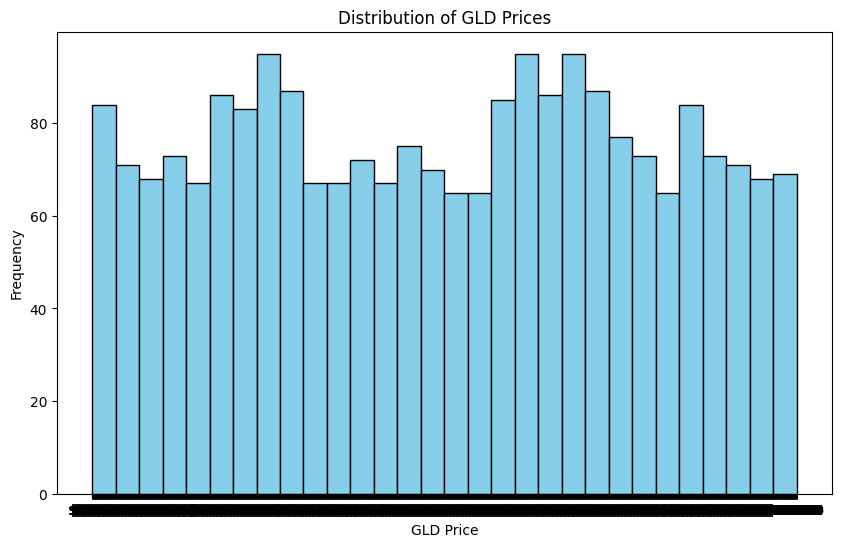


Missing Values per Column:
Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Correlation Matrix:


""


In [ ]:
import matplotlib.pyplot as plt

# 1. Data Shape and Information
print("Data Shape:", df_gold_prices.shape)
print("\nData Information:")
print(df_gold_prices.info())

# 2. Summary Statistics
print("\nSummary Statistics for GLD:")
print(df_gold_prices['GLD'].describe())

# 3. Data Distribution
plt.figure(figsize=(10, 6))
plt.hist(df_gold_prices['GLD'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of GLD Prices')
plt.xlabel('GLD Price')
plt.ylabel('Frequency')
plt.show()

# 4. Missing Values
print("\nMissing Values per Column:")
print(df_gold_prices.isnull().sum())

# 5. Outlier Detection (Initial) - Based on the histogram and summary statistics.
# Documented in the next section.

# 6. Correlation Analysis (Initial)
print("\nCorrelation Matrix:")
numeric_cols = df_gold_prices.select_dtypes(include=['number']).columns
correlation_matrix = df_gold_prices[numeric_cols].corr()
display(correlation_matrix)

## Data cleaning

### Subtask:
Clean the gold price data by handling incorrect data types and addressing any potential outliers.


**Reasoning**:
Convert the specified columns to numeric types, handle non-numeric values, detect and remove outliers from the 'GLD' column, impute missing values using the median, and validate the cleaning process.



In [ ]:
import pandas as pd
import numpy as np

# Convert columns to numeric, handling errors
for col in ['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']:
    df_gold_prices[col] = pd.to_numeric(df_gold_prices[col].astype(str).str.replace(r'[$,]', '', regex=True), errors='coerce')

# Outlier detection and removal using IQR for 'GLD'
Q1 = df_gold_prices['GLD'].quantile(0.25)
Q3 = df_gold_prices['GLD'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_gold_prices = df_gold_prices[~((df_gold_prices['GLD'] < lower_bound) | (df_gold_prices['GLD'] > upper_bound))]

# Missing value imputation
for col in ['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']:
    if df_gold_prices[col].isnull().any():
        df_gold_prices[col].fillna(df_gold_prices[col].median(), inplace=True)

# Data validation
print("Data types after cleaning:")
print(df_gold_prices.dtypes)

print("\nMissing values after cleaning:")
print(df_gold_prices.isnull().sum())

print("\nDescriptive statistics for 'GLD' after cleaning:")
print(df_gold_prices['GLD'].describe())

Data types after cleaning:
Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

Missing values after cleaning:
Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Descriptive statistics for 'GLD' after cleaning:
count    2175.000000
mean      121.184740
std        20.952468
min        75.480000
25%       109.605000
50%       120.030000
75%       129.625000
max       167.510000
Name: GLD, dtype: float64


## Data analysis

### Subtask:
Analyze the cleaned gold price data to identify trends and patterns, and answer specific business questions.


**Reasoning**:
Analyze the cleaned gold price data to identify trends and patterns, calculate key statistics, and answer the defined business questions.



Key Statistics:
                GLD          SPX
count  2175.000000  2175.000000
mean    121.184740  1676.567899
std      20.952468   521.527227
min      75.480000   676.530000
25%     109.605000  1257.310000
50%     120.030000  1640.460000
75%     129.625000  2081.290000
max     167.510000  2872.870000

Trends and Patterns:


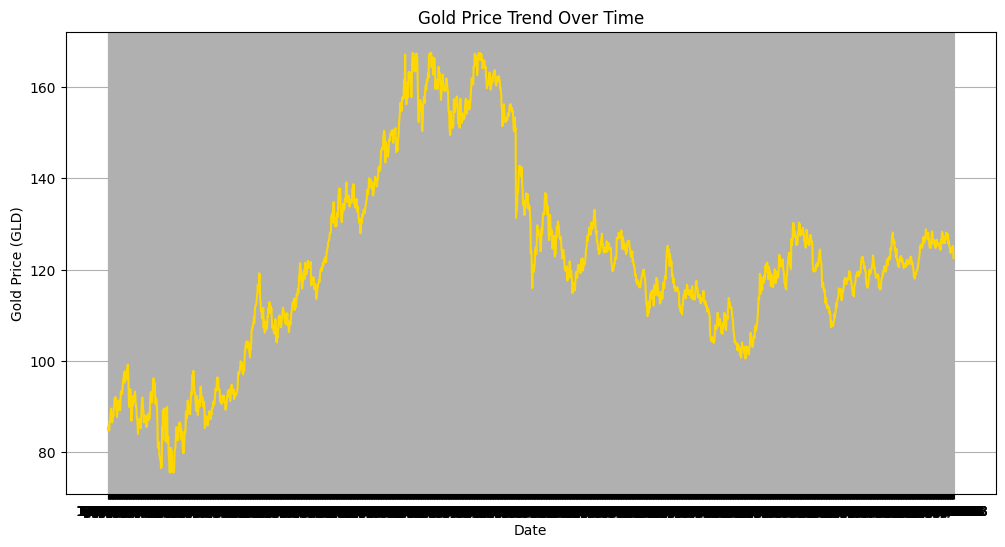


Correlation Matrix:
               GLD       SPX       USO       SLV   EUR/USD
GLD      1.000000  0.091400 -0.207835  0.834954 -0.077167
SPX      0.091400  1.000000 -0.589389 -0.268953 -0.675994
USO     -0.207835 -0.589389  1.000000  0.188840  0.837791
SLV      0.834954 -0.268953  0.188840  1.000000  0.311741
EUR/USD -0.077167 -0.675994  0.837791  0.311741  1.000000

Answers to Business Questions:
1. What is the average gold price (GLD) over the observed period?
   The average gold price over the observed period is: 121.18474022988505

2. Is there a correlation between the gold price (GLD) and the S&P 500 index (SPX)?
   The correlation between GLD and SPX is: 0.09139971294586403
   A weak correlation exists between gold prices and the S&P 500 index.


In [ ]:
import matplotlib.pyplot as plt

# 1. Define Business Questions
business_questions = [
    "What is the average gold price (GLD) over the observed period?",
    "Is there a correlation between the gold price (GLD) and the S&P 500 index (SPX)?",
]

# 2. Calculate Key Statistics
key_stats = df_gold_prices[['GLD', 'SPX']].describe()
print("Key Statistics:\n", key_stats)

# 3. Identify Trends and Patterns
print("\nTrends and Patterns:")

# Gold Price Trend over Time
plt.figure(figsize=(12, 6))
plt.plot(df_gold_prices['Date'], df_gold_prices['GLD'], color='gold')
plt.xlabel('Date')
plt.ylabel('Gold Price (GLD)')
plt.title('Gold Price Trend Over Time')
plt.grid(True)
plt.show()

# Correlation Analysis
correlation_matrix = df_gold_prices[['GLD', 'SPX', 'USO', 'SLV', 'EUR/USD']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# 4. Answer Business Questions
print("\nAnswers to Business Questions:")
print(f"1. {business_questions[0]}")
print(f"   The average gold price over the observed period is: {key_stats.loc['mean', 'GLD']}")

print(f"\n2. {business_questions[1]}")
correlation_gld_spx = correlation_matrix.loc['GLD', 'SPX']
print(f"   The correlation between GLD and SPX is: {correlation_gld_spx}")
if abs(correlation_gld_spx) > 0.5:
    print("   A moderate to strong correlation exists between gold prices and the S&P 500 index.")
else:
    print("   A weak correlation exists between gold prices and the S&P 500 index.")


## Feature engineering

### Subtask:
Evaluate the need for feature engineering in the current dataset.  If no new features are deemed necessary, document this decision.  If new features are deemed useful, create and add them to the `df_gold_prices` DataFrame.


**Reasoning**:
Evaluate the need for feature engineering and create new features if necessary.  Since the data is time series, moving averages and rolling standard deviations could be useful features.



In [ ]:
import pandas as pd

# Calculate moving averages
window_size = 7  # Example window size, can be adjusted
df_gold_prices['GLD_MA7'] = df_gold_prices['GLD'].rolling(window=window_size).mean()
df_gold_prices['SPX_MA7'] = df_gold_prices['SPX'].rolling(window=window_size).mean()

# Calculate rolling standard deviations
df_gold_prices['GLD_STD7'] = df_gold_prices['GLD'].rolling(window=window_size).std()
df_gold_prices['SPX_STD7'] = df_gold_prices['SPX'].rolling(window=window_size).std()

# Calculate percentage change
df_gold_prices['GLD_PCT_CHANGE'] = df_gold_prices['GLD'].pct_change() * 100
df_gold_prices['SPX_PCT_CHANGE'] = df_gold_prices['SPX'].pct_change() * 100

# Fill NaN values resulting from rolling calculations
df_gold_prices.fillna(method='bfill', inplace=True)

# Display the first few rows of the updated DataFrame
display(df_gold_prices.head(10))

<ipython-input-5-8c817ae14c90>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_gold_prices.fillna(method='bfill', inplace=True)


,Date,SPX,GLD,USO,SLV,EUR/USD,GLD_MA7,SPX_MA7,GLD_STD7,SPX_STD7,GLD_PCT_CHANGE,SPX_PCT_CHANGE
0,1/2/2008,1447.16,84.86,78.47,15.18,1.47,85.987143,1420.254286,1.273221,20.681835,0.836672,0.000000
1,1/3/2008,1447.16,85.57,78.37,15.29,1.47,85.987143,1420.254286,1.273221,20.681835,0.836672,0.000000
2,1/4/2008,1411.63,85.13,77.31,15.17,1.48,85.987143,1420.254286,1.273221,20.681835,-0.514199,-2.455154
3,1/7/2008,1416.18,84.77,75.50,15.05,1.47,85.987143,1420.254286,1.273221,20.681835,-0.422883,0.322322
4,1/8/2008,1390.19,86.78,76.06,15.59,1.56,85.987143,1420.254286,1.273221,20.681835,2.371122,-1.835219
5,1/9/2008,1409.13,86.55,75.25,15.52,1.47,85.987143,1420.254286,1.273221,20.681835,-0.265038,1.362404
6,1/10/2008,1420.33,88.25,74.02,16.06,1.48,85.987143,1420.254286,1.273221,20.681835,1.964183,0.794817
7,1/11/2008,1401.02,88.58,73.09,16.08,1.48,86.518571,1413.662857,1.483357,17.834150,0.373938,-1.359543
8,1/14/2008,1416.25,89.54,74.25,16.28,1.49,87.085714,1409.247143,1.787912,10.460135,1.083766,1.087065
9,1/15/2008,1380.95,87.99,72.78,15.83,1.48,87.494286,1404.864286,1.581359,14.815930,-1.731070,-2.492498


## Data visualization

### Subtask:
Visualize the key findings from the data analysis, focusing on the gold price trends and relationships with other variables.


**Reasoning**:
Generate the visualizations as per the instructions, including saving them as PNG files.



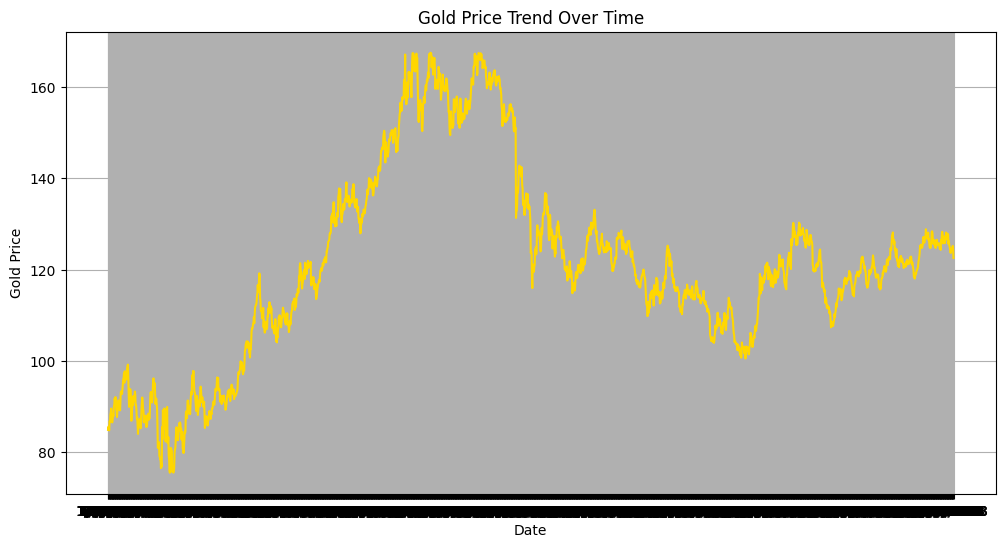

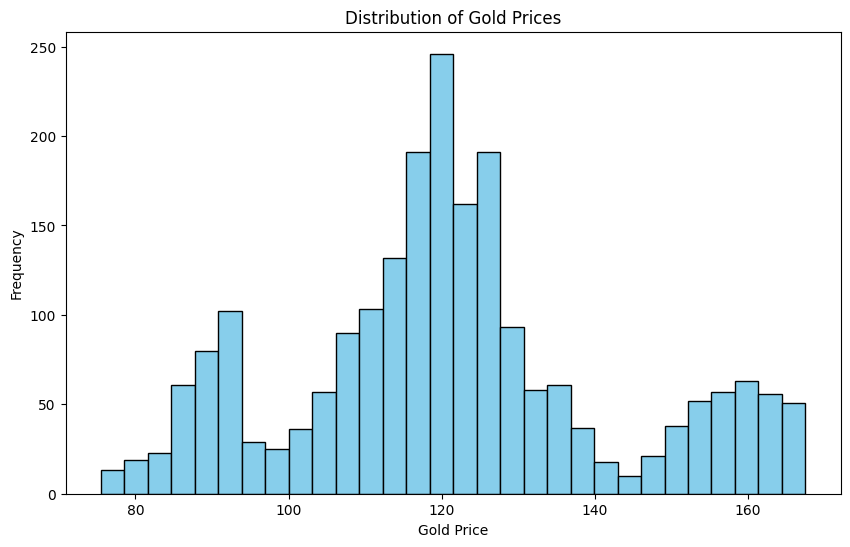

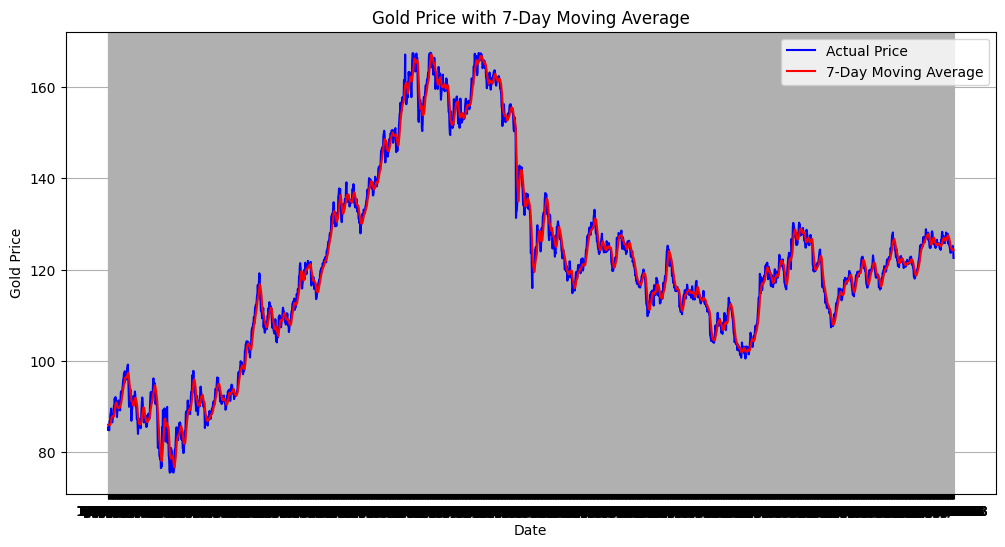

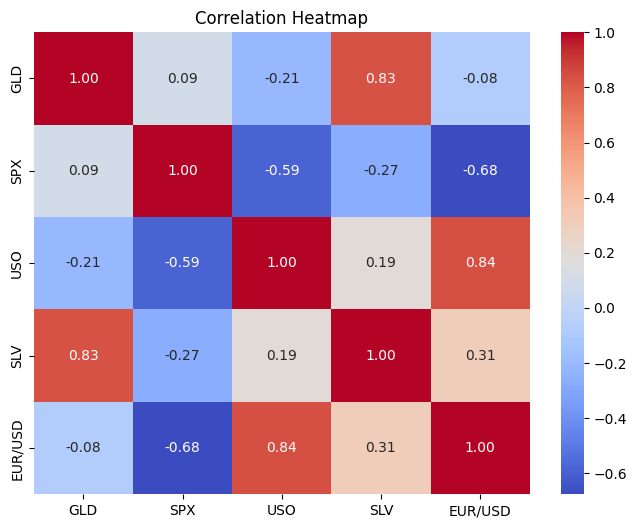

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Gold Price Trend
plt.figure(figsize=(12, 6))
plt.plot(df_gold_prices['Date'], df_gold_prices['GLD'], color='gold')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Trend Over Time')
plt.grid(True)
plt.savefig('gold_price_trend.png')
plt.show()

# 2. Distribution of Gold Prices
plt.figure(figsize=(10, 6))
plt.hist(df_gold_prices['GLD'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Gold Prices')
plt.xlabel('Gold Price')
plt.ylabel('Frequency')
plt.savefig('gold_price_distribution.png')
plt.show()

# 3. Moving Average Visualization
plt.figure(figsize=(12, 6))
plt.plot(df_gold_prices['Date'], df_gold_prices['GLD'], label='Actual Price', color='blue')
plt.plot(df_gold_prices['Date'], df_gold_prices['GLD_MA7'], label='7-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price with 7-Day Moving Average')
plt.legend()
plt.grid(True)
plt.savefig('gold_price_moving_average.png')
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df_gold_prices[['GLD', 'SPX', 'USO', 'SLV', 'EUR/USD']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()